# Checagem de dados

Scripts com exemplos de como fazer o carregamento e divisão dos dados de forma estratificada.
 

In [1]:
# imports

import os
import sys
sys.path.append(os.path.abspath('..'))
from rasterio.coords import BoundingBox

import src.data.preprocess_data as data
#import src.models.unets as unets

import torch

### Definições
Quais tiles e o número de subtiels são definidos a seguir. 

In [2]:
tiles = ['032027', '032026'] 
num_subtiles = 6


Divisão do conjunto de treino, validação e teste, em que cada arquivo em data/processed dos tiles correspondentes são associados a um dos conjuntos.

É feita a estratificação baseada nas máscaras, de acordo com o valor de classe escolhida pelo usuário.

Neste exemplo, é feita pelo tipo.



In [3]:

train_files, val_files, test_files = data.train_val_test_stratify(tiles, 
                                                                  num_subtiles,
                                                                    train_size = 0.7, 
                                                                    val_size = 0.15, 
                                                                    stratify_by = 'type')



Loading:  <function yaml_filename at 0x7a968f65b130>
File already saved, loading it.


In [4]:
train_files, val_files, test_files
len(train_files), len(val_files), len(test_files)

(50, 11, 11)

## Checagem de resultados da estratificação

data.check_stratification imprime o número de pixels de cada classe por divisão de conjunto. 

In [5]:
data.check_stratification(train_files+val_files+test_files, num_subtiles=6, stratify_by='type')

data.check_stratification(train_files, num_subtiles=6, stratify_by='type')
data.check_stratification(val_files, num_subtiles=6, stratify_by='type')
data.check_stratification(test_files, num_subtiles=6, stratify_by='type')


0 209780441 223027200; 1 592328 223027200; 2 637884 223027200; 3 170864 223027200; 4 11845683 223027200; {0: 0.9406047378974403, 1: 0.0026558554292929293, 2: 0.0028601175103305787, 3: 0.0007661128328741965, 4: 0.05311317633006198}
0 149598214 154880000; 1 290244 154880000; 2 339459 154880000; 3 34414 154880000; 4 4617669 154880000; {0: 0.9658975594008264, 1: 0.0018739927685950412, 2: 0.0021917549070247936, 3: 0.0002221978305785124, 4: 0.029814495092975207}
0 31117282 34073600; 1 148655 34073600; 2 182883 34073600; 3 50737 34073600; 4 2574043 34073600; {0: 0.9132372863448535, 1: 0.004362761786250939, 2: 0.005367293153643877, 3: 0.0014890413692712247, 4: 0.07554361734598046}
0 29064945 34073600; 1 153429 34073600; 2 115542 34073600; 3 85713 34073600; 4 4653971 34073600; {0: 0.8530048189800902, 1: 0.004502870257325319, 2: 0.0033909537002253945, 3: 0.002515525216003005, 4: 0.13658583184635611}


{0: 0.8530048189800902,
 1: 0.004502870257325319,
 2: 0.0033909537002253945,
 3: 0.002515525216003005,
 4: 0.13658583184635611}

In [6]:
train_files_no_strat, val_files_no_strat, test_files_no_strat = data.train_val_test_stratify(tiles, 
                                                                  num_subtiles,
                                                                    train_size = 0.7, 
                                                                    val_size = 0.15, 
                                                                    stratify_by = '')

Loading:  <function yaml_filename at 0x7a968f65b130>
File already saved, loading it.


In [7]:
data.check_stratification(train_files_no_strat+val_files_no_strat+test_files_no_strat, num_subtiles=6, stratify_by='')

data.check_stratification(train_files_no_strat, num_subtiles=6, stratify_by='')
data.check_stratification(val_files_no_strat, num_subtiles=6, stratify_by='')
data.check_stratification(test_files_no_strat, num_subtiles=6, stratify_by='')

0 209780441 223027200; 1 592328 223027200; 3 560797 223027200; 8 3482885 223027200; 9 8362798 223027200; 2 77087 223027200; 5 144892 223027200; 6 2539 223027200; 7 2296 223027200; 4 21137 223027200; {0: 0.9406047378974403, 1: 0.0026558554292929293, 3: 0.002514478054694674, 8: 0.015616413603363178, 9: 0.03749676272669881, 2: 0.0003456394556359045, 5: 0.0006496606691919191, 6: 1.1384261650596878e-05, 7: 1.029470844811754e-05, 4: 9.47731935835629e-05}
0 147683318 154880000; 1 397088 154880000; 3 360958 154880000; 8 2290989 154880000; 9 4022504 154880000; 2 49047 154880000; 5 64860 154880000; 6 2539 154880000; 7 2296 154880000; 4 6401 154880000; {0: 0.9535338197314049, 1: 0.0025638429752066114, 3: 0.002330565599173554, 8: 0.014792026084710743, 9: 0.025971745867768594, 2: 0.0003166774276859504, 5: 0.000418775826446281, 6: 1.6393336776859503e-05, 7: 1.4824380165289256e-05, 4: 4.132877066115702e-05}
0 31714697 34073600; 1 115540 34073600; 2 11566 34073600; 3 119395 34073600; 8 475981 34073600

{0: 0.8916705601990984,
 9: 0.08047086307287754,
 1: 0.0023390542824943653,
 3: 0.0023608893688955674,
 8: 0.021010841237791133,
 2: 0.00048348281367392937,
 5: 0.0015755893125469571,
 4: 8.871971262208866e-05}

## Salvar e carregar

Um arquivo yaml é salvo automaticamente.


In [8]:

train_files, val_files, test_files = data.train_val_test_stratify(tiles, 
                                                                  num_subtiles,
                                                                    train_size = 0.7, 
                                                                    val_size = 0.15, 
                                                                    stratify_by = 'type')


Loading:  <function yaml_filename at 0x7a968f65b130>
File already saved, loading it.


## Dataset e dataloader

Carregamento de imagens e mascaras, por tipo.

É feita com janelamento com stride de metade do tamanho da imagem.

Adicionalmente, é feito data augmentation. As classes minoritárias que tem 1% ou mais de área da imagem geram 8 cópias contendo as transformacoes "Dihedral Group of Order 8" (ou D₄).

In [9]:
%%time
train_dataset = data.SubtileDataset(train_files, 
                    num_subtiles = num_subtiles, 
                    classes_mode = 'type', 
                    patch_size=256, 
                    stride=128, 
                    data_augmentation = True, # testando 
                    return_imgidx = False,
                    treat_nans=True, # they supposelly are saved as negative, then a true here cut costs
                    debug=False)



Doing data augmentation...
Augmented 1455 images, of 9800
CPU times: user 58.8 s, sys: 764 ms, total: 59.6 s
Wall time: 59.6 s


Das 9800 imagens, 1455 delas tiveram mais de 1% de área de classes minoritárias. Essas são readicionadas no dataset em 7 transformações adicionais.

Isso gera, para este conjunto de treino, 1455*7 + 9800 = 19985 imagens.
 

In [10]:
print(len(train_dataset))
for img, mask in train_dataset:
    print(img.shape)
    print(mask.shape)
    break

19985
torch.Size([12, 256, 256])
torch.Size([1, 256, 256])


### Exemplo de imagem

0


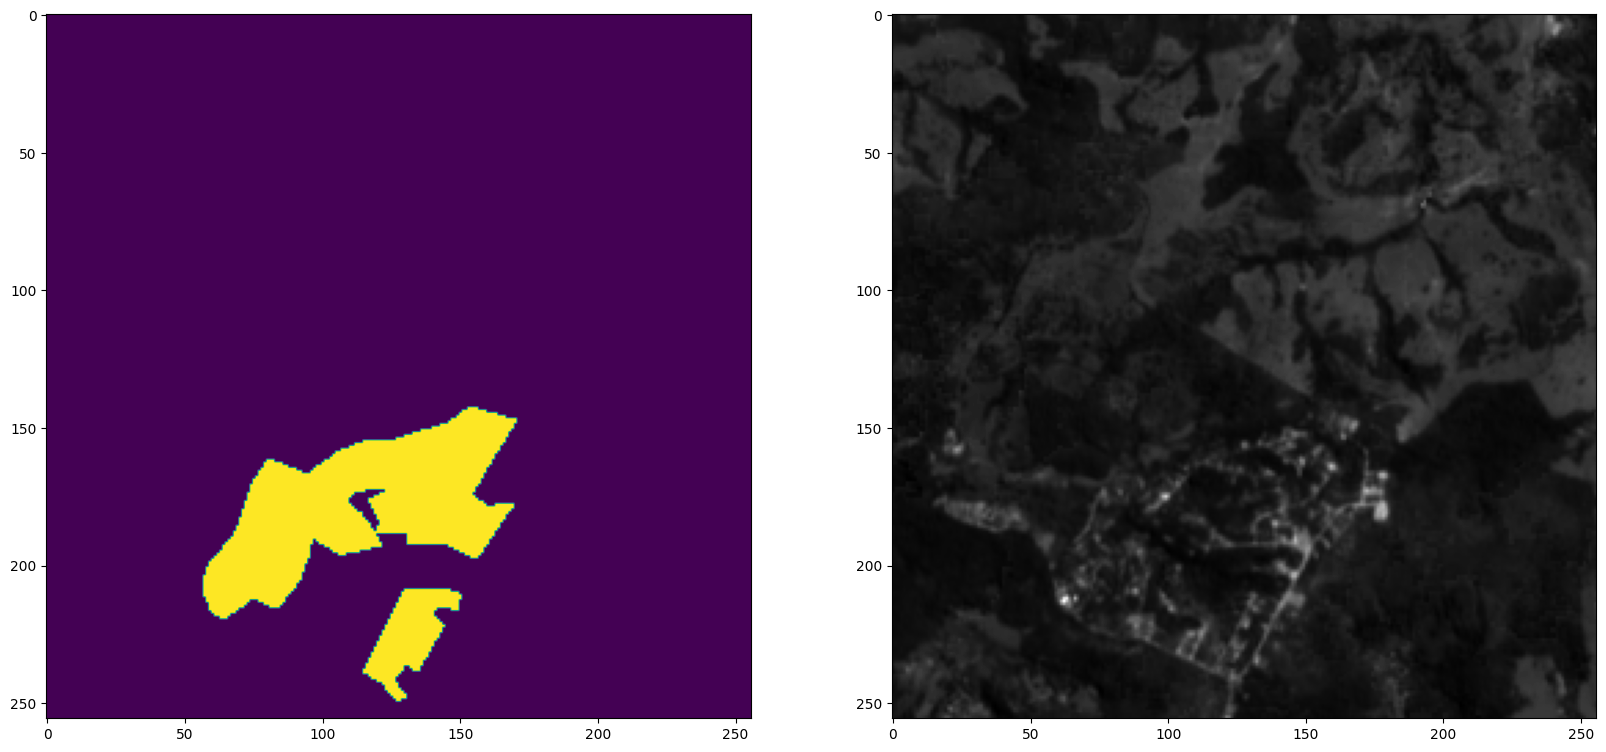

1


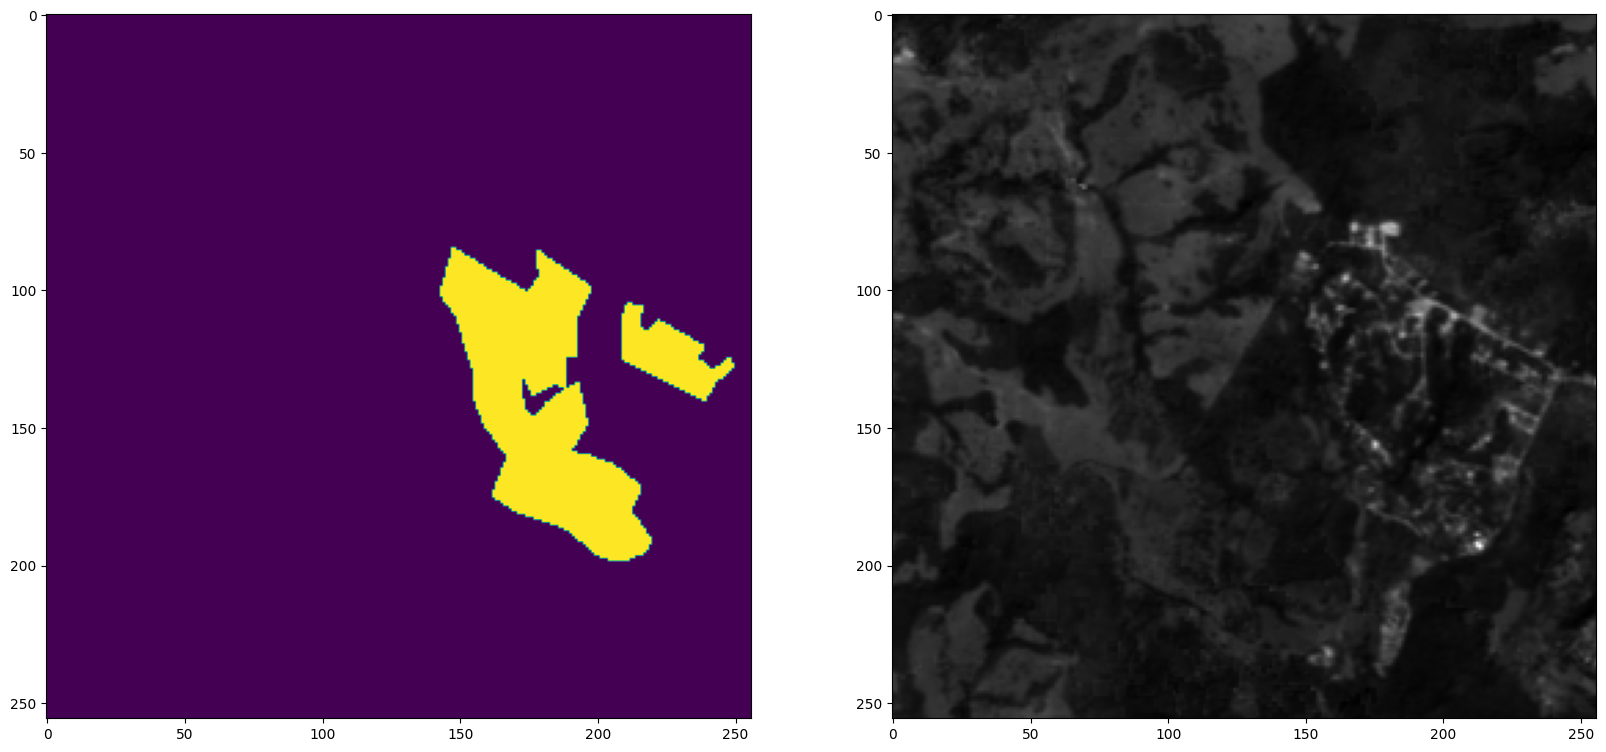

2


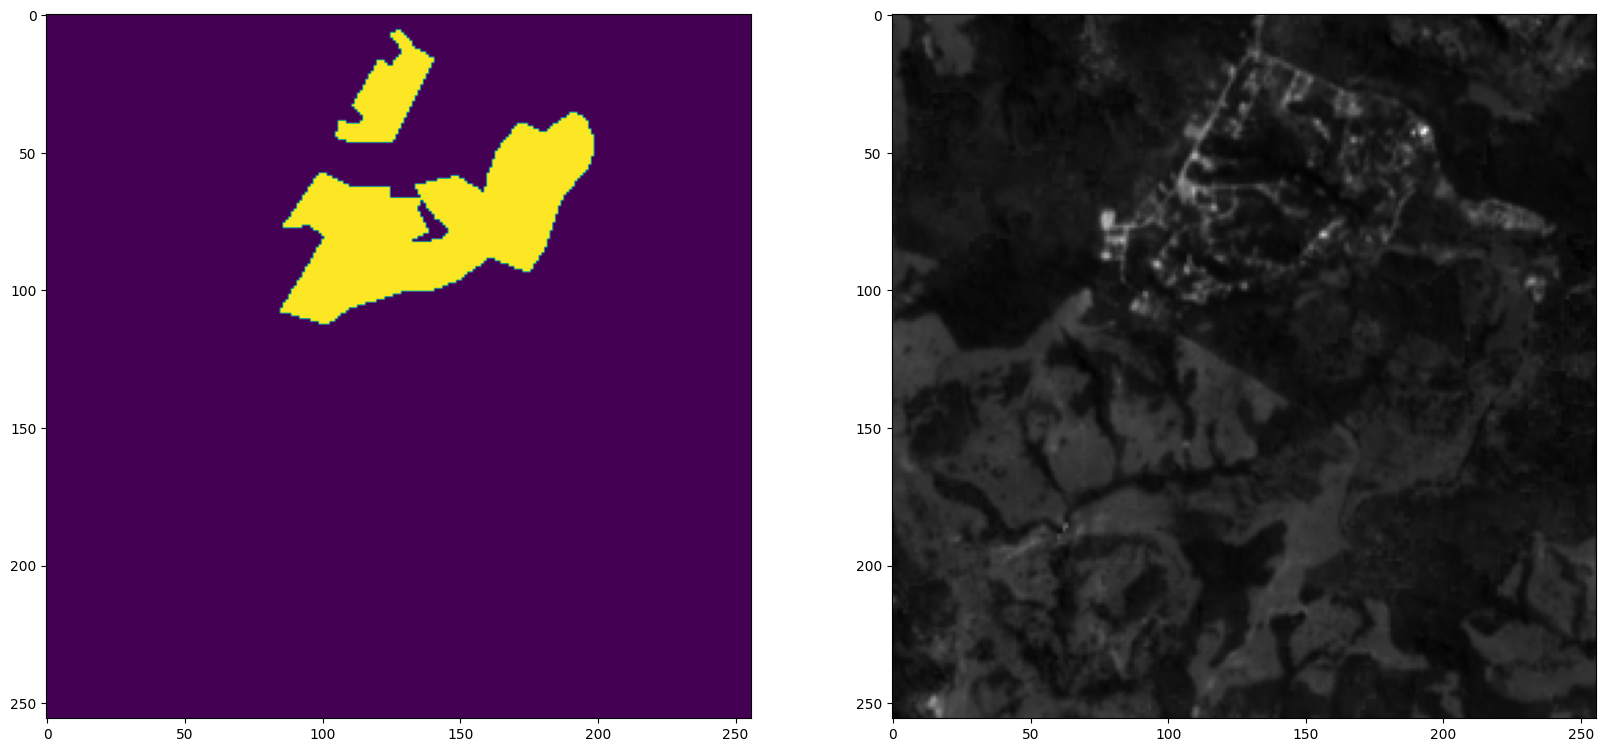

CPU times: user 1.06 s, sys: 27.1 ms, total: 1.09 s
Wall time: 869 ms


In [11]:
%%time
import matplotlib.pyplot as plt

i = 0
for img, mask in train_dataset:
    if  (mask != 0).any():
        #subtile_composition.display_images(img)
        plt.figure(figsize=(20,20))
        plt.subplot(1,2,1)
        plt.imshow(mask.squeeze())
        plt.subplot(1,2,2)
        plt.imshow(img[2].squeeze(),cmap='gray')
        plt.show()
        i+=1

    if i == 3:
        pass
        break
    print(i)
    #img,mask = next(train_dataset)

In [12]:
%%time
for i in range(len(train_dataset)):
    image, label = train_dataset[i]
    print(f"Sample {i}: Image shape = {image.shape}, Label shape = {label.shape}")
#4 min, with nan =  false


Sample 0: Image shape = torch.Size([12, 256, 256]), Label shape = torch.Size([1, 256, 256])
Sample 1: Image shape = torch.Size([12, 256, 256]), Label shape = torch.Size([1, 256, 256])
Sample 2: Image shape = torch.Size([12, 256, 256]), Label shape = torch.Size([1, 256, 256])
Sample 3: Image shape = torch.Size([12, 256, 256]), Label shape = torch.Size([1, 256, 256])
Sample 4: Image shape = torch.Size([12, 256, 256]), Label shape = torch.Size([1, 256, 256])
Sample 5: Image shape = torch.Size([12, 256, 256]), Label shape = torch.Size([1, 256, 256])
Sample 6: Image shape = torch.Size([12, 256, 256]), Label shape = torch.Size([1, 256, 256])
Sample 7: Image shape = torch.Size([12, 256, 256]), Label shape = torch.Size([1, 256, 256])
Sample 8: Image shape = torch.Size([12, 256, 256]), Label shape = torch.Size([1, 256, 256])
Sample 9: Image shape = torch.Size([12, 256, 256]), Label shape = torch.Size([1, 256, 256])
Sample 10: Image shape = torch.Size([12, 256, 256]), Label shape = torch.Size([1

### Dataloader

Para carregar várias imagens em batches, usamos dataloaders

In [13]:
from torch.utils.data import DataLoader
batch_size = 16
train_loader = DataLoader(train_dataset, 
                            batch_size=16, 
                            shuffle=True)

In [14]:
for batch in train_loader:
    img = batch[0]
    mask = batch[1]
    print(img.shape)
    print(mask.shape)
    
    break

torch.Size([16, 12, 256, 256])
torch.Size([16, 1, 256, 256])


### Mostrando 1 batch

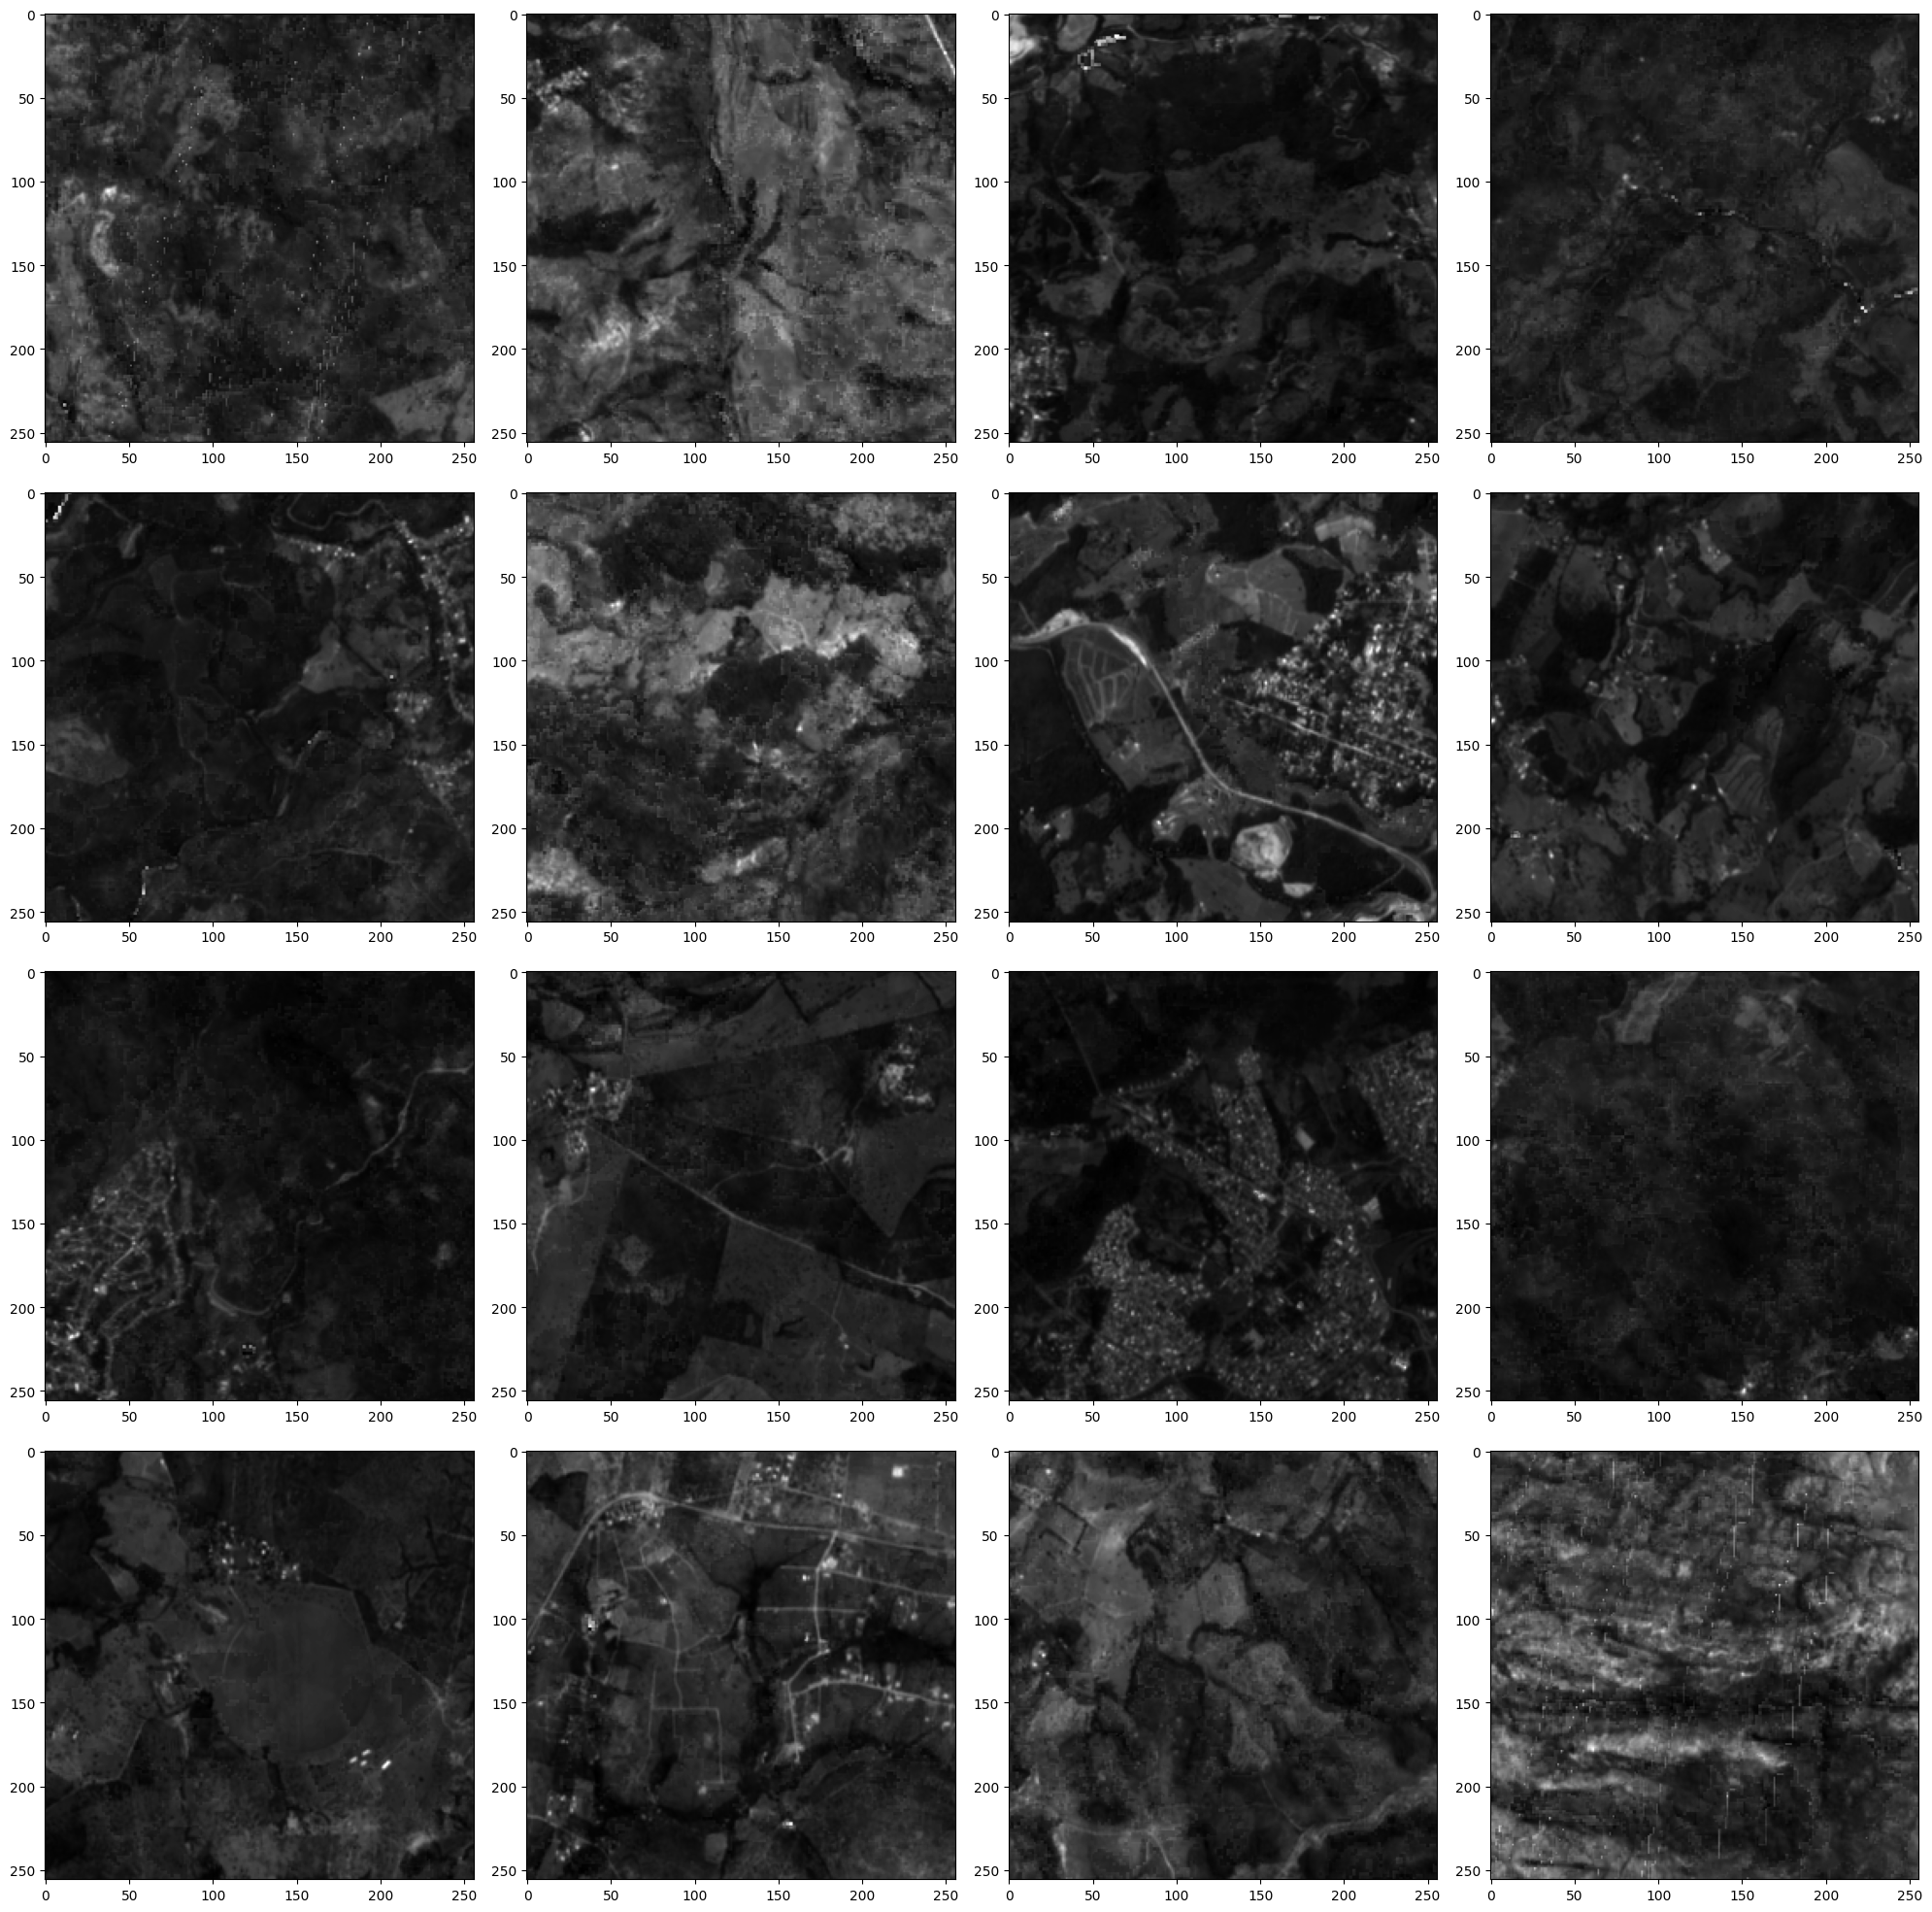

In [15]:
#subtile_composition.display_images(img)
plt.figure(figsize=(20,20))
for i in range(batch_size):
    plt.subplot(4,4,i+1)
    plt.imshow(img[i,1,:,:].squeeze(),cmap='gray')
    plt.tight_layout()
plt.show()


In [16]:
for batch in train_loader:
    img = batch[0]
    mask = batch[1]
    unique_classes, counts = torch.unique(mask, return_counts=True)
    print("Class distribution in y_true:")
    for cls, count in zip(unique_classes, counts):
        print(f"Class {cls.item()}: {count.item()} samples")

Class distribution in y_true:
Class 0: 981197 samples
Class 1: 664 samples
Class 2: 25346 samples
Class 4: 41369 samples
Class distribution in y_true:
Class 0: 983148 samples
Class 4: 65428 samples
Class distribution in y_true:
Class 0: 1016896 samples
Class 4: 31680 samples
Class distribution in y_true:
Class 0: 1013972 samples
Class 4: 34604 samples
Class distribution in y_true:
Class 0: 960323 samples
Class 1: 640 samples
Class 2: 952 samples
Class 4: 86661 samples
Class distribution in y_true:
Class 0: 1022663 samples
Class 1: 2835 samples
Class 2: 2307 samples
Class 4: 20771 samples
Class distribution in y_true:
Class 0: 920547 samples
Class 2: 530 samples
Class 4: 127499 samples
Class distribution in y_true:
Class 0: 972033 samples
Class 1: 1278 samples
Class 2: 1099 samples
Class 4: 74166 samples
Class distribution in y_true:
Class 0: 1017590 samples
Class 1: 4129 samples
Class 4: 26857 samples
Class distribution in y_true:
Class 0: 962307 samples
Class 2: 17727 samples
Class 3:

In [ ]:
for i in range(len(train_dataset)):
    image, label = train_dataset[i]
    print(f"Sample {i}: Image shape = {image.shape}, Label shape = {label.shape}")
    
    unique_classes, counts = torch.unique(label, return_counts=True)
    print("Class distribution in y_true:")
    for cls, count in zip(unique_classes, counts):
        print(f"Class {cls.item()}: {count.item()} samples")
    print()

Sample 0: Image shape = torch.Size([12, 256, 256]), Label shape = torch.Size([1, 256, 256])
Class distribution in y_true:
Class 0: 65536 samples

Sample 1: Image shape = torch.Size([12, 256, 256]), Label shape = torch.Size([1, 256, 256])
Class distribution in y_true:
Class 0: 60700 samples
Class 4: 4836 samples

Sample 2: Image shape = torch.Size([12, 256, 256]), Label shape = torch.Size([1, 256, 256])
Class distribution in y_true:
Class 0: 60700 samples
Class 4: 4836 samples

Sample 3: Image shape = torch.Size([12, 256, 256]), Label shape = torch.Size([1, 256, 256])
Class distribution in y_true:
Class 0: 60700 samples
Class 4: 4836 samples

Sample 4: Image shape = torch.Size([12, 256, 256]), Label shape = torch.Size([1, 256, 256])
Class distribution in y_true:
Class 0: 60700 samples
Class 4: 4836 samples

Sample 5: Image shape = torch.Size([12, 256, 256]), Label shape = torch.Size([1, 256, 256])
Class distribution in y_true:
Class 0: 60700 samples
Class 4: 4836 samples

Sample 6: Imag

In [ ]:
import numpy as np
import time
from scipy.interpolate import griddata, RectBivariateSpline
from scipy.ndimage import distance_transform_edt, convolve
import pandas as pd

# Generate a large 2D array with NaNs
np.random.seed(42)
arr = np.random.rand(1000, 1000).astype(np.float32)
arr[np.random.rand(*arr.shape) < 0.2] = np.nan  # Introduce 20% NaNs

# Method 1: scipy.interpolate.griddata
def method_griddata(arr):
    mask = ~np.isnan(arr)
    x, y = np.indices(arr.shape)
    valid_x = x[mask]
    valid_y = y[mask]
    valid_values = arr[mask]
    nan_x = x[~mask]
    nan_y = y[~mask]
    arr[~mask] = griddata((valid_x, valid_y), valid_values, (nan_x, nan_y), method='linear')
    return arr

# Method 2: scipy.ndimage.distance_transform_edt (Nearest Neighbor)
def method_nearest(arr):
    mask = np.isnan(arr)
    indices = distance_transform_edt(mask, return_distances=False, return_indices=True)
    return arr[tuple(indices)]

# Method 3: scipy.interpolate.RectBivariateSpline (Corrected)
def method_spline(arr):
    valid_mask = ~np.isnan(arr)
    x, y = np.indices(arr.shape)
    x_unique = np.unique(x[0, :])
    y_unique = np.unique(y[:, 0])
    interp_func = RectBivariateSpline(x_unique, y_unique, arr, kx=1, ky=1)
    arr[np.isnan(arr)] = interp_func(x[np.isnan(arr)], y[np.isnan(arr)], grid=False)
    return arr

# Method 4: Convolution with a kernel
def method_convolution(arr):
    mask = np.isnan(arr)
    kernel = np.array([[0, 1, 0],
                       [1, 0, 1],
                       [0, 1, 0]], dtype=np.float32)
    kernel /= np.sum(kernel)
    filled_arr = arr.copy()
    filled_arr[mask] = 0
    filled_arr = convolve(filled_arr, kernel, mode='constant', cval=0.0)
    filled_arr[mask] = filled_arr[mask] / convolve(~mask, kernel, mode='constant', cval=0.0)[mask]
    return filled_arr

# Method 5: pandas.DataFrame.interpolate
def method_pandas(arr):
    df = pd.DataFrame(arr)
    filled_df = df.interpolate(method='linear', axis=0).interpolate(method='linear', axis=1)
    return filled_df.to_numpy()

# Benchmark function
def benchmark(method, arr, method_name):
    start_time = time.time()
    result = method(arr.copy())  # Use a copy to avoid modifying the original array
    elapsed_time = time.time() - start_time
    print(f"{method_name}: {elapsed_time:.4f} seconds")
    return result

# Run benchmarks
print("Benchmarking interpolation methods...")
benchmark(method_griddata, arr, "griddata")
benchmark(method_nearest, arr, "nearest")
#benchmark(method_spline, arr, "spline")
benchmark(method_convolution, arr, "convolution")
benchmark(method_pandas, arr, "pandas")

Benchmarking interpolation methods...
griddata: 12.3273 seconds
nearest: 0.0403 seconds
convolution: 0.0235 seconds
pandas: 0.1033 seconds


/tmp/ipykernel_259721/1063582880.py:50: RuntimeWarning: divide by zero encountered in divide
  filled_arr[mask] = filled_arr[mask] / convolve(~mask, kernel, mode='constant', cval=0.0)[mask]
/tmp/ipykernel_259721/1063582880.py:50: RuntimeWarning: invalid value encountered in divide
  filled_arr[mask] = filled_arr[mask] / convolve(~mask, kernel, mode='constant', cval=0.0)[mask]


array([[0.37454012, 0.9507143 , 0.7746864 , ..., 0.13681863, 0.2914122 ,
        0.44600576],
       [0.18513294, 0.54190093, 0.87294585, ..., 0.22330326, 0.05705472,
        0.28218707],
       [0.2617057 , 0.2469788 , 0.9062546 , ..., 0.30978787, 0.29004553,
        0.3500511 ],
       ...,
       [0.08526213, 0.09203751, 0.69438213, ..., 0.93032575, 0.91330034,
        0.17538922],
       [0.09977664, 0.9638265 , 0.7600546 , ..., 0.33470458, 0.6709858 ,
        0.5524189 ],
       [0.11429115, 0.15980354, 0.8257271 , ..., 0.418072  , 0.42867127,
        0.92944854]], dtype=float32)